# SETANDO ALTERACOES

/var/folders/ry/qvd7kcmj0_5dt3lpv2q80_gm0000gp/T/ipykernel_4213/3877943638.py:96: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  .assign(ano = pd.to_datetime(df_fla_placar['data']).dt.year)
/var/folders/ry/qvd7kcmj0_5dt3lpv2q80_gm0000gp/T/ipykernel_4213/3877943638.py:97: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  .assign(mes = pd.to_datetime(df_fla_placar['data']).dt.month)
/var/folders/ry/qvd7kcmj0_5dt3lpv2q80_gm0000gp/T/ipykernel_4213/3877943638.py:98: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  .assign(mensal_overview = pd.to_datetime(df_fla_placar["data"]))


,partida_id,data,mandante,visitante,tecnico_visitante,mandante_Placar,visitante_Placar,resultado,vencedor,tecnico,arena,formacao_mandante,formacao_visitante,ano,mes,mensal_overview,cont_empates,cont_vitorias,cont_derrotas
590,6127,14/04/2018,Vitoria,Flamengo,M. Nogueira Barbieri,2,2,Empate,Empate,M. Nogueira Barbieri,Barradão,4-2-3-1,4-1-4-1,2018,4,2018-04-01,0,0,0
591,6137,21/04/2018,Flamengo,America-MG,E. Alves Moreira,2,0,Vitoria,Flamengo,M. Nogueira Barbieri,Maracanã,4-1-4-1,4-2-3-1,2018,4,2018-04-01,1,1,0
592,6148,29/04/2018,Ceara,Flamengo,M. Nogueira Barbieri,0,3,Vitoria,Flamengo,M. Nogueira Barbieri,Arena Castelão,3-4-2-1,4-3-3,2018,4,2018-04-01,1,1,0
593,6159,06/05/2018,Flamengo,Internacional,O. Hellmann,2,0,Vitoria,Flamengo,M. Nogueira Barbieri,Maracanã,4-1-4-1,4-1-4-1,2018,5,2018-05-01,1,1,0
594,6172,13/05/2018,Chapecoense,Flamengo,M. Nogueira Barbieri,3,2,Derrota,Chapecoense,M. Nogueira Barbieri,Arena Condá,4-1-4-1,4-1-4-1,2018,5,2018-05-01,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,8325,23/11/2023,Flamengo,Bragantino,P. Faria Caixinha,1,0,Vitoria,Flamengo,A. Bacchi,Maracanã,4-2-3-1,4-2-3-1,2023,11,2023-11-01,1,1,0
814,8371,26/11/2023,America-MG,Flamengo,A. Bacchi,0,3,Vitoria,Flamengo,A. Bacchi,Estádio Municipal Parque do Sabiá,4-2-3-1,4-2-3-1,2023,11,2023-11-01,1,1,0
815,8378,29/11/2023,Flamengo,Atletico-MG,L. Scolari,0,3,Derrota,Atletico-MG,A. Bacchi,Maracanã,4-2-3-1,4-4-2,2023,11,2023-11-01,1,0,1
816,8388,03/12/2023,Flamengo,Cuiaba,A. Cardoso de Oliveira,2,1,Vitoria,Flamengo,A. Bacchi,Maracanã,4-2-3-1,3-4-2-1,2023,12,2023-12-01,1,1,0


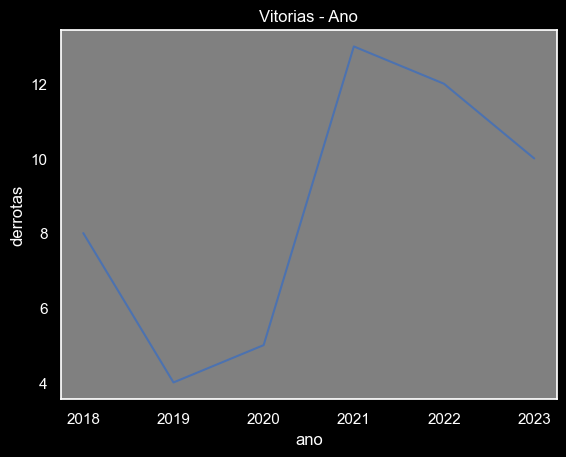

In [70]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from dotenv import load_dotenv

import datetime
from dateutil import relativedelta

import streamlit as st

load_dotenv()

try:

    df_brasileiro_cards = pd.read_csv(os.getenv('BRASILEIRO_CARTOES'))
    df_brasileiro_full = pd.read_csv(os.getenv('BRASILEIRO_FULL')) # PARTIDAS
    df_brasileiro_stats = pd.read_csv(os.getenv('BRASILEIRO_ESTATISTICAS'))
    df_brasileiro_gols = pd.read_csv(os.getenv('BRASILEIRO_GOLS'))

except:
    raise FileExistsError('Could not find database file')

df_fla_stats = df_brasileiro_stats.query("clube == 'Flamengo'")
df_fla_gols = df_brasileiro_gols.query("clube == 'Flamengo'")
df_fla_cards = df_brasileiro_cards.query("clube == 'Flamengo'")
df_fla_jogos = df_brasileiro_full.query("mandante == 'Flamengo' or visitante == 'Flamengo'")

#PEGANDO UNIDO AS ESTATÍSTICAS COM OS JOGOS E REMOVENDO DADOS COM CAMPOS VAZIOS
df_fla_jogos = df_fla_jogos.rename(columns={'ID':'partida_id'})
df_jogos_stats = pd.merge(df_fla_jogos, df_fla_stats, how = "left", on="partida_id")


list_vencedor = []
list_result = []
list_tecnico = []

for i in df_jogos_stats.dropna().itertuples():

    if i.mandante_Placar == i.visitante_Placar:
        list_vencedor.append('Empate')
        list_result.append('Empate')
        
        if i.mandante == 'Flamengo':
            list_tecnico.append(i.tecnico_mandante)
        else:
            list_tecnico.append(i.tecnico_visitante)

    elif i.mandante_Placar > i.visitante_Placar:

        list_vencedor.append(i.mandante)

        if i.mandante == 'Flamengo':
            list_result.append('Vitoria')
        else:
            list_result.append('Derrota')

        if i.mandante == 'Flamengo':
            list_tecnico.append(i.tecnico_mandante)
        else:
            list_tecnico.append(i.tecnico_visitante)

    else:
        list_vencedor.append(i.visitante)

        if i.visitante == 'Flamengo':
            list_result.append('Vitoria')
        else:
            list_result.append('Derrota')

        if i.mandante == 'Flamengo':
            list_tecnico.append(i.tecnico_mandante)
        else:
            list_tecnico.append(i.tecnico_visitante)

df_jogos_stats = (
                    df_jogos_stats
                    .dropna()
                    .drop(['rodata_y'], axis = 1)
                    .rename(columns = {'rodata_x': 'rodata'})
                    .assign(resultado = list_result)
                    .assign(vencedor = list_vencedor)
                    .assign(tecnico = list_tecnico)
                )

# TRAZENDO OS CAMPOS DE INTERESSE
df_fla_placar = df_jogos_stats[['partida_id', 'data','mandante','visitante','tecnico_visitante', 'mandante_Placar','visitante_Placar','resultado','vencedor','tecnico','arena','formacao_mandante', 'formacao_visitante']]

# ADICINANDO COLUNA PARA FAZER O HISTÓRICO ANUAL

df_fla_placar = (
    df_fla_placar
    .assign(ano = pd.to_datetime(df_fla_placar['data']).dt.year)
    .assign(mes = pd.to_datetime(df_fla_placar['data']).dt.month)
    .assign(mensal_overview = pd.to_datetime(df_fla_placar["data"]))
    .assign(resultado = np.where(
                                    (df_fla_placar['mandante_Placar'] > df_fla_placar['visitante_Placar']) & (df_fla_placar['mandante'] == "Flamengo"), 'Vitoria',
                                    np.where(
                                        (df_fla_placar['mandante_Placar'] > df_fla_placar['visitante_Placar']) & (df_fla_placar['mandante'] != "Flamengo"), 'Derrota',
                                    np.where(
                                        (df_fla_placar['visitante_Placar'] > df_fla_placar['mandante_Placar']) & (df_fla_placar['mandante'] == "Flamengo"), 'Derrota',
                                    np.where(
                                        (df_fla_placar['visitante_Placar'] > df_fla_placar['mandante_Placar']) & (df_fla_placar['mandante'] != "Flamengo"), 'Vitoria', 'Empate'
                                    )))))
    .assign(cont_empates = np.where(df_fla_placar['resultado'] == "Empate",1,0))
    .assign(cont_vitorias = np.where(df_fla_placar['resultado'] == 'Vitoria',1,0))
    .assign(cont_derrotas = np.where(df_fla_placar['resultado'] == "Derrota",1,0))
    )

df_fla_placar["mensal_overview"] = df_fla_placar["mensal_overview"].apply(lambda x: x.replace(day = 1))
df_fla_placar['cont_empates'] = np.where(df_fla_placar['resultado'] == 'Empate', 0,1)


# PEGANDO APENAS AS VITORIAS

df_fla_vitorias = df_fla_placar[df_fla_placar['resultado'] == 'Vitoria']
df_fla_derrotas = df_fla_placar[df_fla_placar['resultado'] == 'Derrota']
df_fla_empates = df_fla_placar[df_fla_placar['resultado'] == 'Empate']

df_fla_overview_ano = pd.DataFrame({
    'ano': df_fla_placar['ano'].drop_duplicates().values.tolist(),
    'vitorias': [x[0] for x in df_fla_vitorias[['ano','resultado']].groupby('ano').count().values.tolist()],
    'derrotas': [x[0] for x in df_fla_derrotas[['ano','resultado']].groupby('ano').count().values.tolist()],
    'empates': [x[0] for x in df_fla_empates[['ano','resultado']].groupby('ano').count().values.tolist()]
})

fig, ax = plt.subplots()

sns.set(style="dark", rc={
    'axes.facecolor': 'gray',     # Fundo dos eixos
    'figure.facecolor': 'black',   # Fundo da figura
    'axes.edgecolor': 'white',     # Cor da borda dos eixos
    'grid.color': 'gray',          # Cor da grade
    'xtick.color': 'white',        # Cor dos ticks no eixo x
    'ytick.color': 'white',        # Cor dos ticks no eixo y
    'axes.labelcolor': 'white',    # Cor dos rótulos dos eixos
    'text.color': 'white'          # Cor do texto
})

# sns.set(
#     style="dark", rc = {
#     "axes.facecolor": "black",
#     "figure.facecolor": "black"
#     }
# )
sns.lineplot(x='ano', y = 'derrotas', data = df_fla_overview_ano, ax = ax)
# ax.set_box_aspect(aspect=0.5)
ax.set_title('Vitorias - Ano')
df_fla_placar


In [65]:
# (
#     pd.DataFrame(
#         {
#     'mes': df_fla_placar['mensal_overview'].drop_duplicates().values.tolist(),
#     'vitorias': [x[0] for x in df_fla_vitorias[['mensal_overview','resultado']].groupby('mensal_overview').count().values.tolist()],
#     'derrotas': [x[0] for x in df_fla_derrotas[['mensal_overview','resultado']].groupby('mensal_overview').count().values.tolist()],
#     'empates': [x[0] for x in df_fla_empates[['mensal_overview','resultado']].groupby('mensal_overview').count().values.tolist()]
#     }
#     )
# )

print(len([x[0] for x in df_fla_vitorias[['mensal_overview','resultado']].groupby('mensal_overview').count().values.tolist()]), len([x[0] for x in df_fla_derrotas[['mensal_overview','resultado']].groupby('mensal_overview').count().values.tolist()]), len([x[0] for x in df_fla_empates[['mensal_overview','resultado']].groupby('mensal_overview').count().values.tolist()]))

# df_fla_empates[['mensal_overview','resultado']]#.groupby('mensal_overview').count()
df_fla_placar

46 34 37


,partida_id,data,mandante,visitante,tecnico_visitante,mandante_Placar,visitante_Placar,resultado,vencedor,tecnico,arena,formacao_mandante,formacao_visitante,ano,mes,mensal_overview,teste,cont_empates
590,6127,14/04/2018,Vitoria,Flamengo,M. Nogueira Barbieri,2,2,Empate,Empate,M. Nogueira Barbieri,Barradão,4-2-3-1,4-1-4-1,2018,4,2018-04-01,seila,0
591,6137,21/04/2018,Flamengo,America-MG,E. Alves Moreira,2,0,Vitoria,Flamengo,M. Nogueira Barbieri,Maracanã,4-1-4-1,4-2-3-1,2018,4,2018-04-01,Vitoria,1
592,6148,29/04/2018,Ceara,Flamengo,M. Nogueira Barbieri,0,3,Vitoria,Flamengo,M. Nogueira Barbieri,Arena Castelão,3-4-2-1,4-3-3,2018,4,2018-04-01,seila,1
593,6159,06/05/2018,Flamengo,Internacional,O. Hellmann,2,0,Vitoria,Flamengo,M. Nogueira Barbieri,Maracanã,4-1-4-1,4-1-4-1,2018,5,2018-05-01,Vitoria,1
594,6172,13/05/2018,Chapecoense,Flamengo,M. Nogueira Barbieri,3,2,Derrota,Chapecoense,M. Nogueira Barbieri,Arena Condá,4-1-4-1,4-1-4-1,2018,5,2018-05-01,seila,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,8325,23/11/2023,Flamengo,Bragantino,P. Faria Caixinha,1,0,Vitoria,Flamengo,A. Bacchi,Maracanã,4-2-3-1,4-2-3-1,2023,11,2023-11-01,Vitoria,1
814,8371,26/11/2023,America-MG,Flamengo,A. Bacchi,0,3,Vitoria,Flamengo,A. Bacchi,Estádio Municipal Parque do Sabiá,4-2-3-1,4-2-3-1,2023,11,2023-11-01,seila,1
815,8378,29/11/2023,Flamengo,Atletico-MG,L. Scolari,0,3,Derrota,Atletico-MG,A. Bacchi,Maracanã,4-2-3-1,4-4-2,2023,11,2023-11-01,seila,1
816,8388,03/12/2023,Flamengo,Cuiaba,A. Cardoso de Oliveira,2,1,Vitoria,Flamengo,A. Bacchi,Maracanã,4-2-3-1,3-4-2-1,2023,12,2023-12-01,Vitoria,1
